In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.cluster import DBSCAN
import scipy.stats
from sklearn.decomposition import PCA

from matplotlib.gridspec import GridSpec

from joblib import dump
from joblib import load

from matplotlib import rcParams
config = {
            "font.family": 'serif',
            "font.size": 12,# 相当于小四大小
            "mathtext.fontset": 'stix',#matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
            "font.serif": ['Arial'],#宋体
            'axes.unicode_minus': False # 处理负号，即-号
         }
rcParams.update(config)

# 获取所有数据对应K的特征值，用于聚类

# DBscan

In [4]:
print(os.getcwd())
os.chdir(os.path.pardir)
print(os.getcwd())
os.chdir('./Step2_Koopman')
print(os.getcwd())

td = np.load('./databygroup.npy',allow_pickle=True).tolist()
AllK={}
for f in td.keys():
    tem = np.load('./results/'+f+'/s.npy',allow_pickle=True)
    AllK[f] = tem

X=[]
for f in AllK.keys():
    X.append(AllK[f].tolist())
X=np.array(X)
print(X.shape)

clustering = DBSCAN(eps=0.025, min_samples=1).fit(X)
print(clustering.labels_,clustering.labels_.shape)
dump(clustering, 'clustering_model.joblib')

c:\Users\chong\Desktop\Koopman_WQ_v3\Koopman_WQ_v3\Step3_dataselect
c:\Users\chong\Desktop\Koopman_WQ_v3\Koopman_WQ_v3
c:\Users\chong\Desktop\Koopman_WQ_v3\Koopman_WQ_v3\Step2_Koopman
(75, 20)
[ 0  1  2  3  4  5  6  6  7  8  2  9 10 11 12  2 11 13 14 15  2 16 11 11
 13 14 17 11  1  6 18 19 11 11 18 20  2 21  2 22  6  6  1 18 23  2 24 25
 26 27 11 28 29 30  2  2 31  2 18 32  2 33 11 26  2 11  2 11 11  2 34  2
  2  2 35] (75,)


c:\Users\chong\anaconda3\envs\torch\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\chong\anaconda3\envs\torch\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\chong\anaconda3\envs\torch\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\chong\anaconda3\envs\torch\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\chong\anaconda3\envs\torch\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


['clustering_model.joblib']

In [ ]:
# 加载模型
clustering = load('clustering_model.joblib')
print(clustering.labels_,clustering.labels_.shape)

[ 0  1  2  3  4  5  6  6  7  8  2  9 10 11 12  2 11 13 14 15  2 16 11 11
 13 14 17 11  1  6 18 19 11 11 18 20  2 21  2 22  6  6  1 18 23  2 24 25
 26 27 11 28 29 30  2  2 31  2 18 32  2 33 11 26  2 11  2 11 11  2 34  2
  2  2 35] (75,)


# 聚类结果作图

c:\Users\chong\Desktop\Koopman_WQ_v3\Koopman_WQ_v3


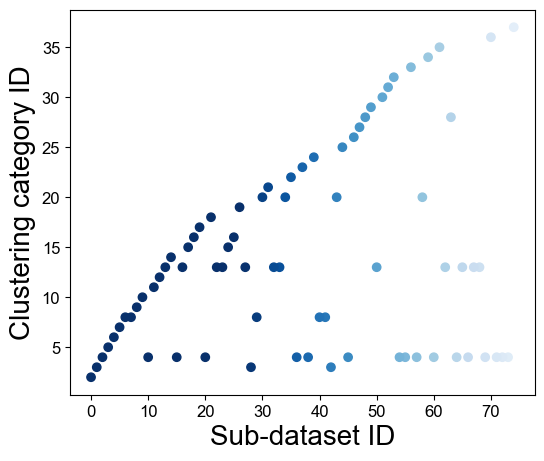

In [5]:
os.chdir(os.path.pardir)
print(os.getcwd())
os.chdir('./Step3_dataselect')


colormap = plt.get_cmap('Blues')
colors   = colormap(np.linspace(0.1, 1.5, clustering.labels_.shape[0])) # 按百分比

plt.figure(figsize=(6,5))
plt.scatter([i for i in range(clustering.labels_.shape[0])][::-1],2+clustering.labels_[::-1],c=colors)
#plt.yticks([i for i in range(1,13)],[i*2 for i in range(1,13)])
plt.xlabel('Sub-dataset ID',fontsize=20)
plt.ylabel('Clustering category ID',fontsize=20)

#plt.xticks([i for i in range(75)],[i for i in range(75)])
#plt.yticks([i+2 for i in range(37)],[i for i in range(37)])

plt.savefig('../cluster.png',dpi=200)

## 改成饼图

In [7]:
# 每个类里面有多少个数据，按数据比例画饼
GROUPED_DATA = {}
for k in clustering.labels_:
    GROUPED_DATA[k] = 0


# 所有原始数据
ALLDATA = []
for k in td.keys():
    ALLDATA.append(td[k])

print('检查subdata和对应的分类是否对上',len(ALLDATA),clustering.labels_.shape[0])

for i in range(clustering.labels_.shape[0]):
    GROUPED_DATA[clustering.labels_[i]] += ALLDATA[i].shape[0]


检查subdata和对应的分类是否对上 75 75


[0.00425494 0.0117507  0.01214753 0.0120814  0.01311757 0.01300734
 0.01269869 0.01225777 0.01219163 0.02414074 0.01157433 0.01188298
 0.0117507  0.01161842 0.01104522 0.01119954 0.01205935 0.04962631
 0.01179479 0.01153024 0.01302939 0.02365572 0.02253136 0.0111775
 0.14237527 0.01214753 0.01269869 0.01223572 0.01225777 0.06329505
 0.01309553 0.01170661 0.01168456 0.20778677 0.03836063 0.11023171]


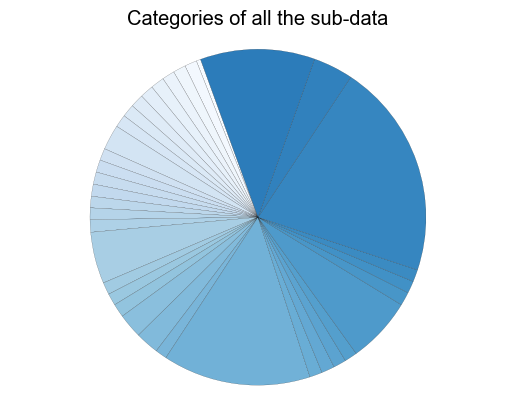

In [8]:
colormap = plt.get_cmap('Blues')
colors   = colormap(np.linspace(0, 1.5, clustering.labels_.shape[0])) # 按百分比

#colormap = plt.get_cmap('coolwarm')
#colors   = colormap(np.linspace(0.1, 1, clustering.labels_.shape[0]))

labels = list(GROUPED_DATA.keys())[::-1]
sizes = list(GROUPED_DATA.values())[::-1]

#plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.pie(sizes, colors=colors, startangle=110, wedgeprops={'edgecolor': 'black', 'linewidth': 0.1})
plt.axis('equal')
plt.title('Categories of all the sub-data')
plt.savefig('../Pie.png',dpi=300)

# 展示比例
print(np.array(sizes)/np.sum(sizes))

# 每个类别代表数据曲线图

In [19]:
# 画前三大比例的曲线，前三大比例为0，2，11

# 每个类里面有多少个数据，按数据比例画饼
GROUPED_SEQDATA = {}
for k in clustering.labels_:
    GROUPED_SEQDATA[k] = []

# 所有原始数据
ALLDATA = []
for k in td.keys():
    ALLDATA.append(td[k])

print('检查subdata和对应的分类是否对上',len(ALLDATA),clustering.labels_.shape[0])

for i in range(clustering.labels_.shape[0]):
    GROUPED_SEQDATA[clustering.labels_[i]].append(ALLDATA[i])


检查subdata和对应的分类是否对上 75 75


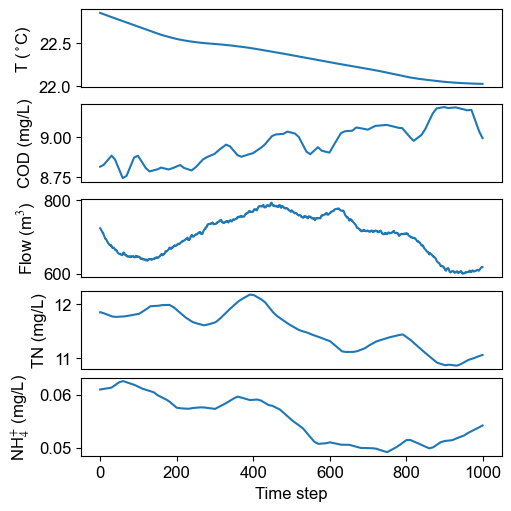

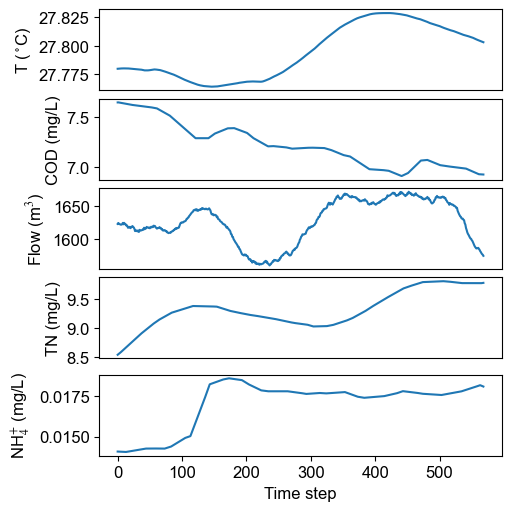

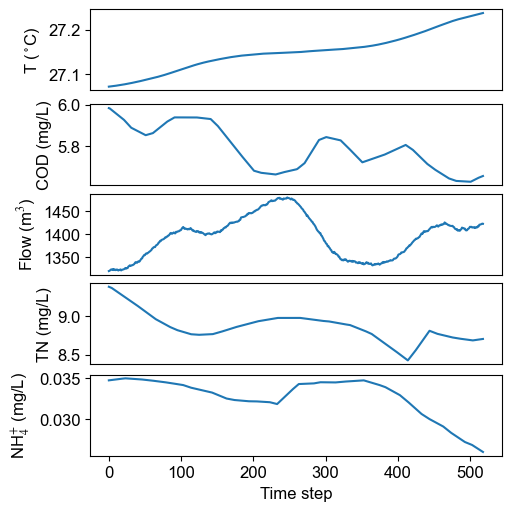

In [10]:
alphas = [0.8,0.4,0.4,0.4]
colors = ['#015482', '#61DE45', '#DEA13A', '#ff474c']#'#DE66C2''#5096DE'
ylabels = ['T ($^\circ$C)','COD (mg/L)','Flow (m$^{3}$)', 'TN (mg/L)','NH$_{4}^{+}$ (mg/L)']
fontsizes = [12, 15, 12]

data_maxmin = np.load('../Step1_datasplit/databygroup_maxmin.npy',allow_pickle=True).tolist()
dmax = np.round(data_maxmin['max'][[-5,-4,-3,-2,-1]],2)
dmin = np.round(data_maxmin['min'][[-5,-4,-3,-2,-1]],2)
dmid = np.round((dmax+dmin)/2,2)

for category in [0,2,11]:
    fig = plt.figure(dpi=100,
                    constrained_layout=True,#类似于tight_layout，使得各子图之间的距离自动调整【类似excel中行宽根据内容自适应】
                    figsize=(5,5)
                    )
    gs = GridSpec(5, 1, figure=fig)#GridSpec将fiure分为3行3列，每行三个axes，gs为一个matplotlib.gridspec.GridSpec对象，可灵活的切片figure

    if category == 0:
        ptdata = (GROUPED_SEQDATA[category][-1][:1000,[-5,-4,-3,-2,-1]]+1)*0.5*(dmax-dmin)+dmin
    else:
        ptdata = (GROUPED_SEQDATA[category][-1][:,[-5,-4,-3,-2,-1]]+1)*0.5*(dmax-dmin)+dmin

    for k in range(5):
        ax = fig.add_subplot(gs[k, 0])
        ax.plot(ptdata[:,k])
        ax.set_ylabel(ylabels[k], fontsize=fontsizes[2])
        if k < 4:
            ax.set_xticks([])
        else:
            ax.set_xlabel('Time step',fontsize=fontsizes[2])

    plt.savefig('../'+str(category)+'.png',dpi=300)


C:\Users\chong\AppData\Local\Temp\ipykernel_14528\203503582.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(dpi=100,


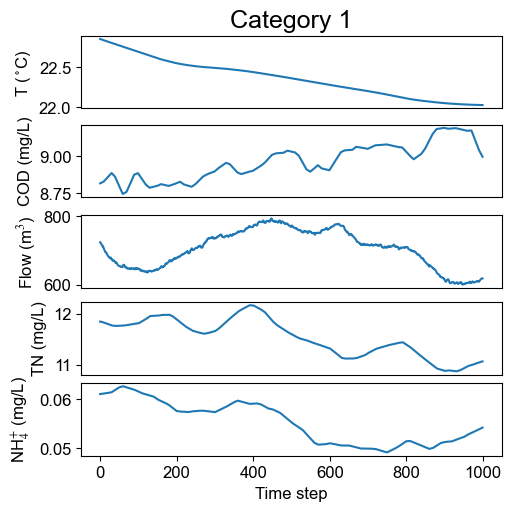

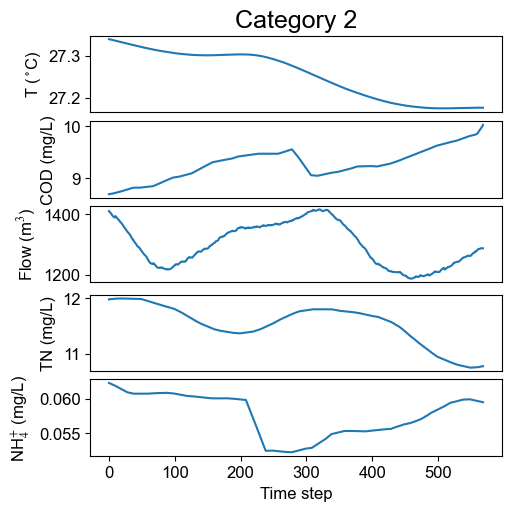

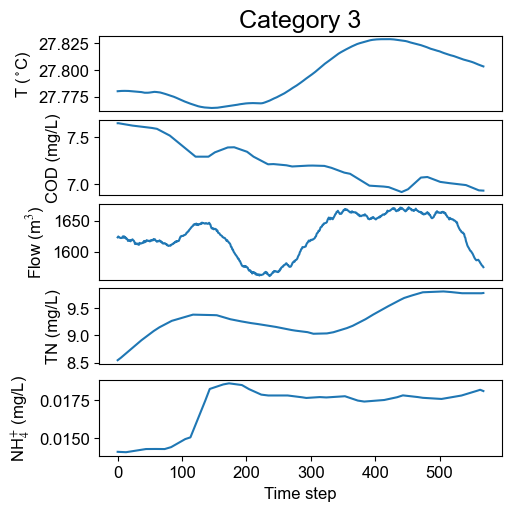

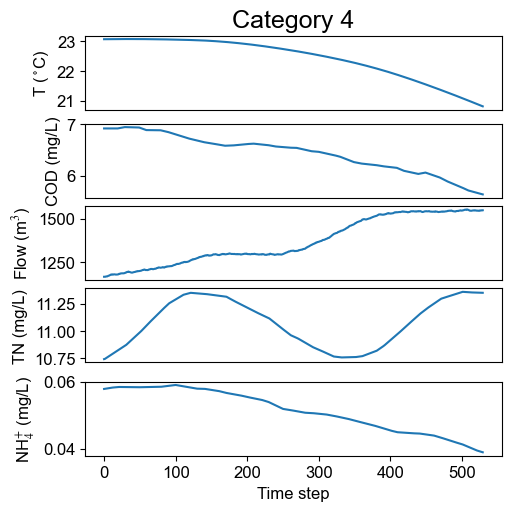

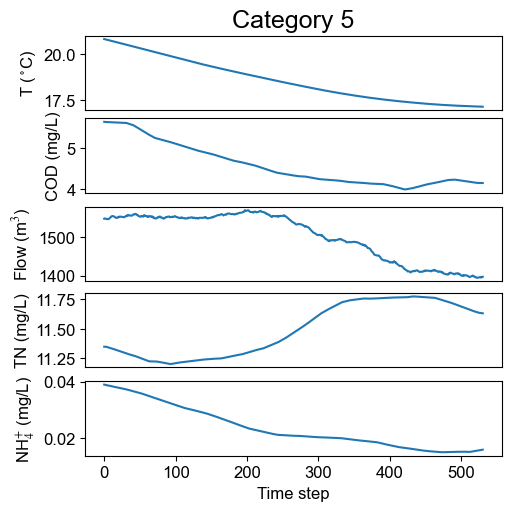

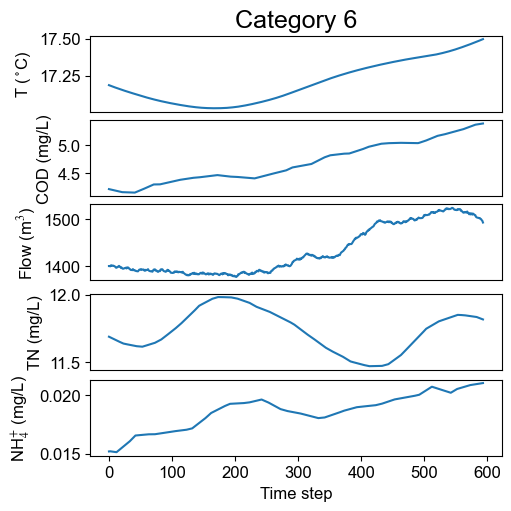

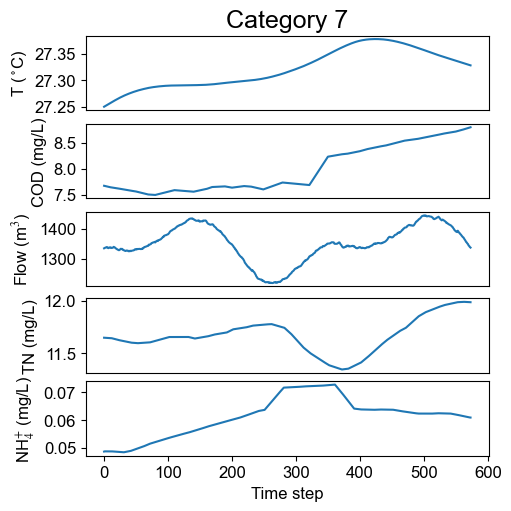

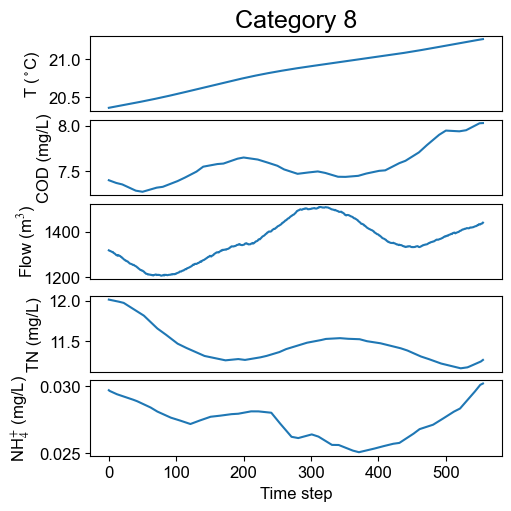

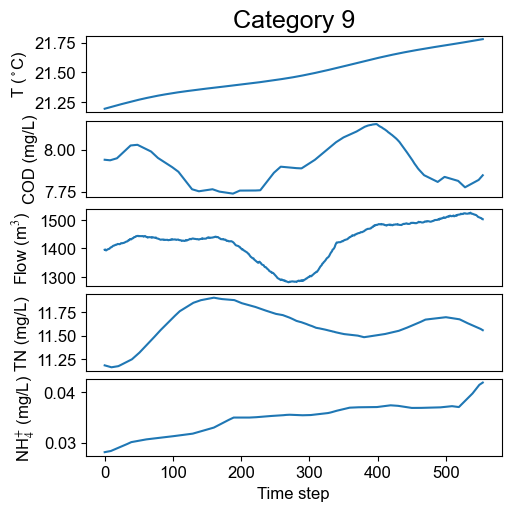

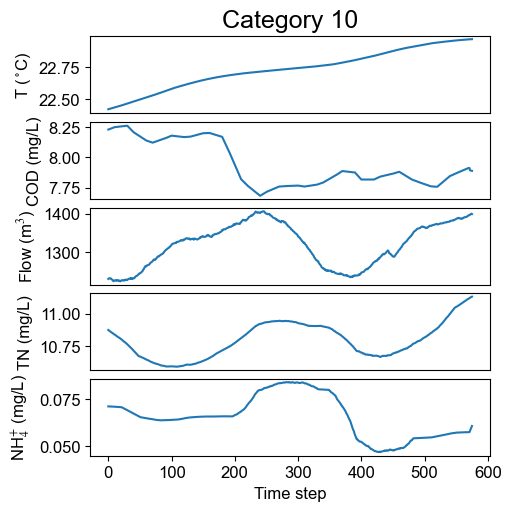

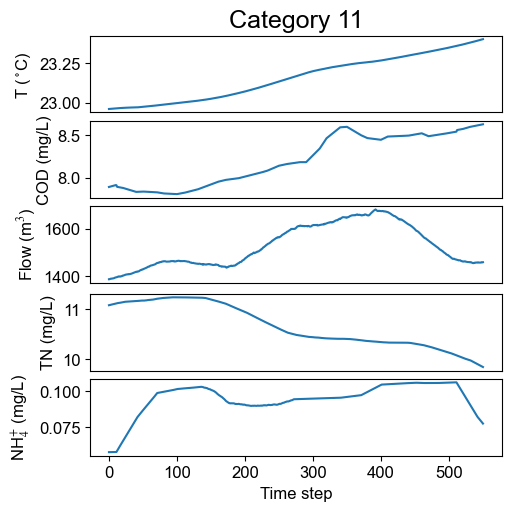

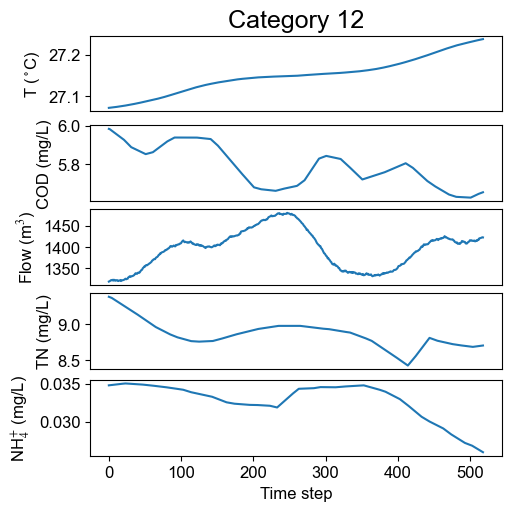

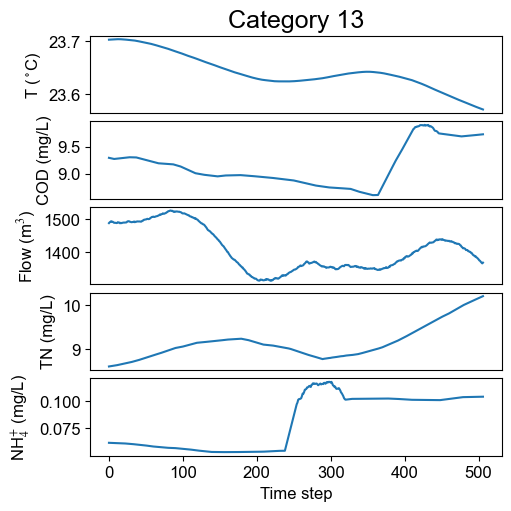

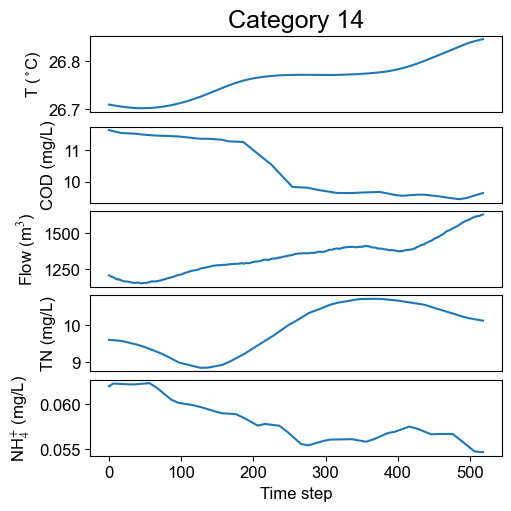

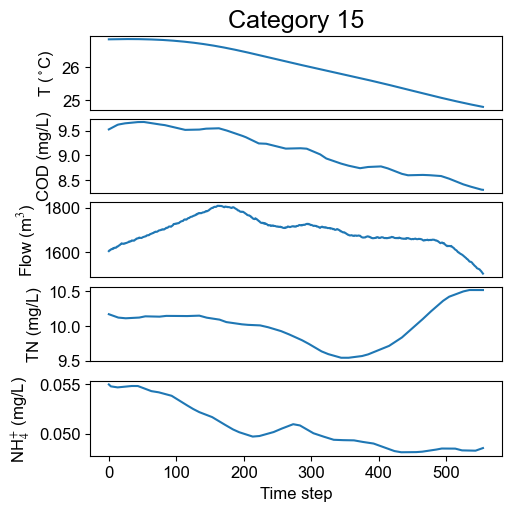

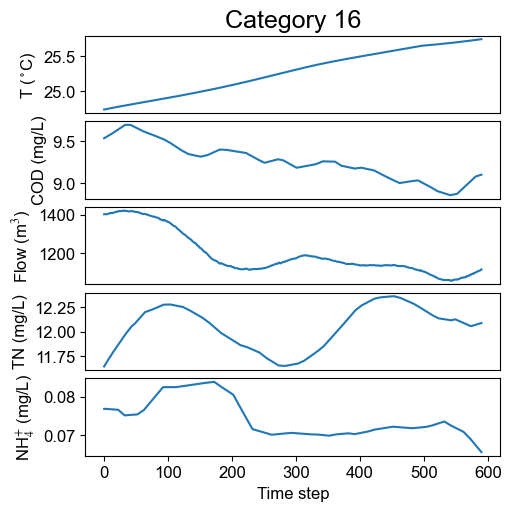

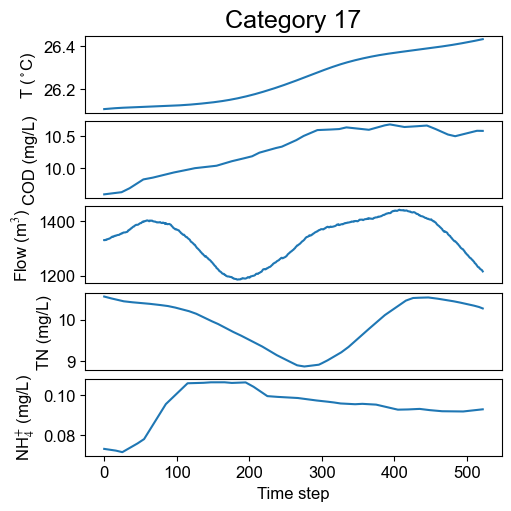

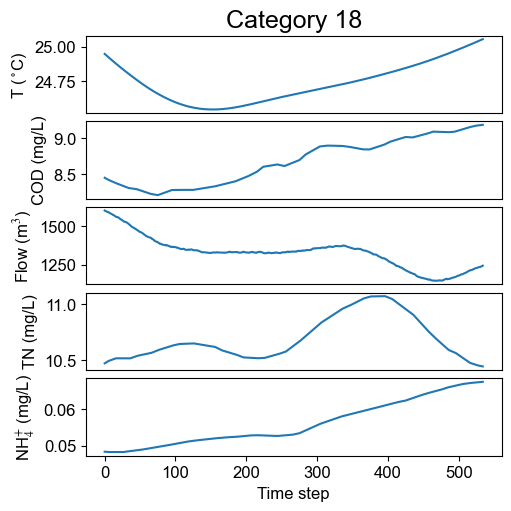

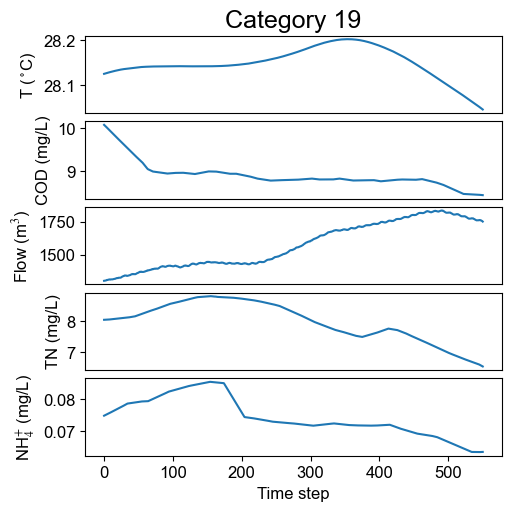

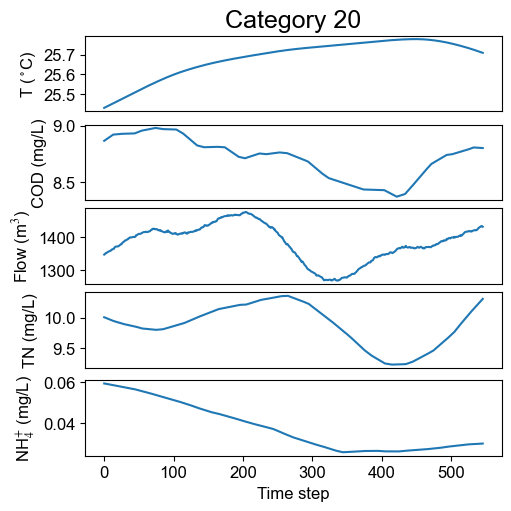

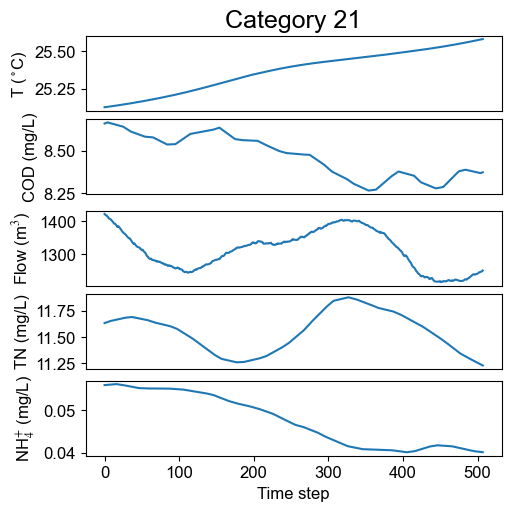

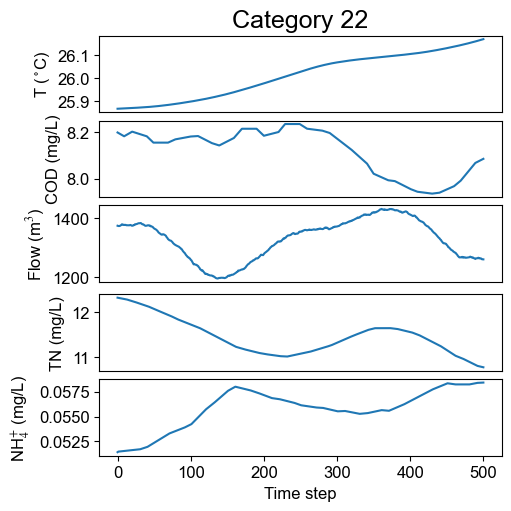

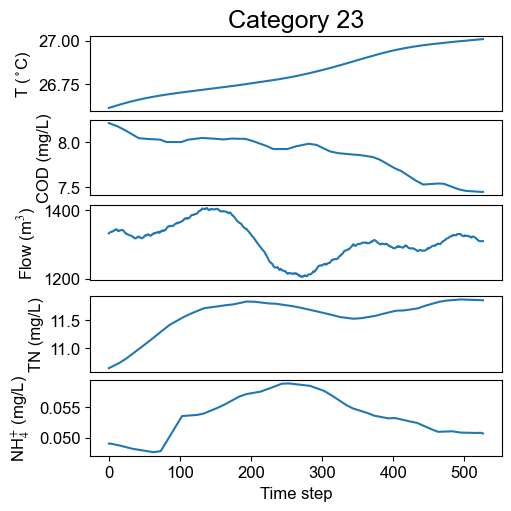

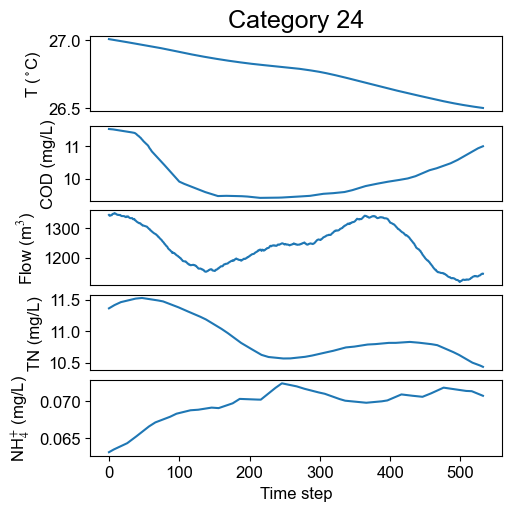

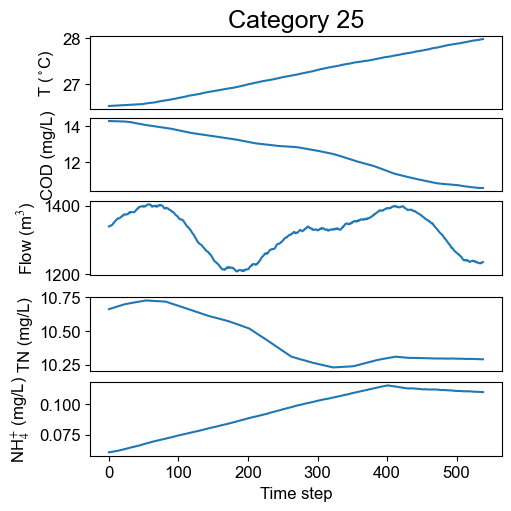

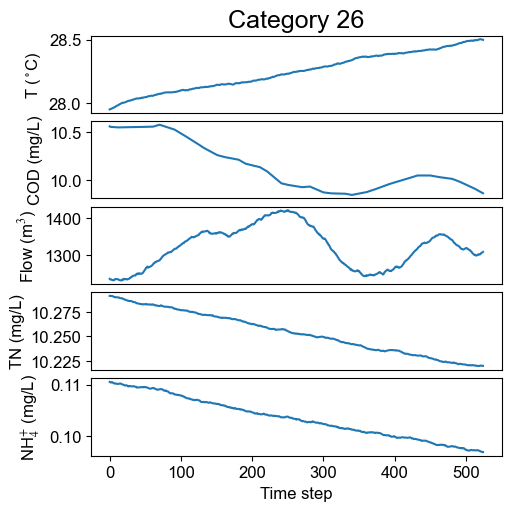

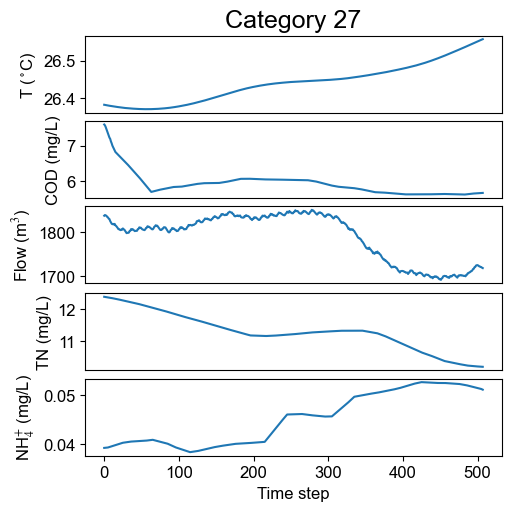

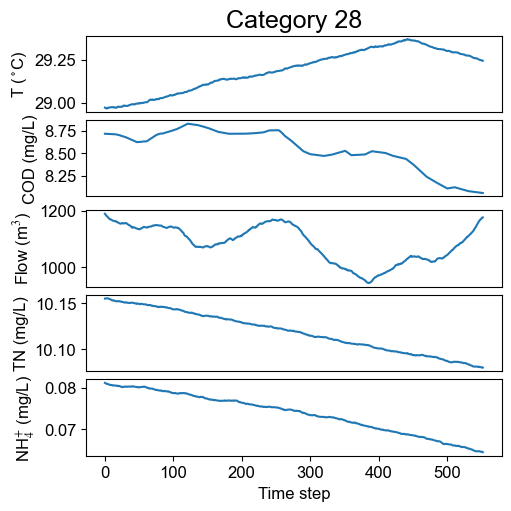

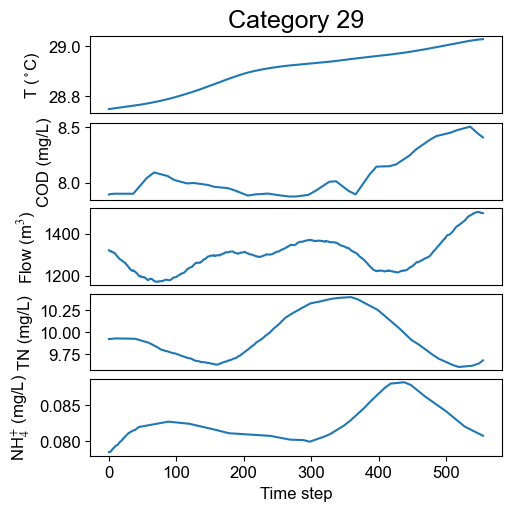

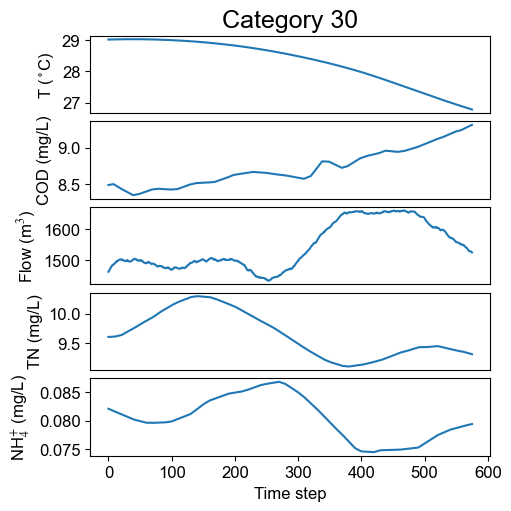

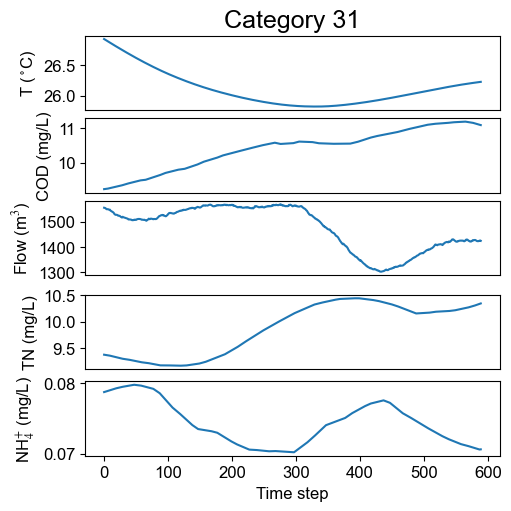

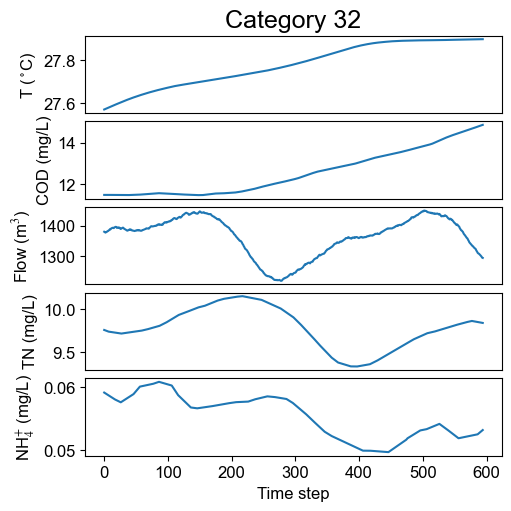

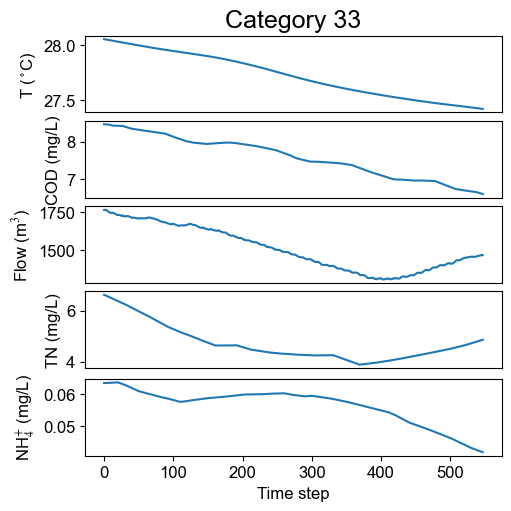

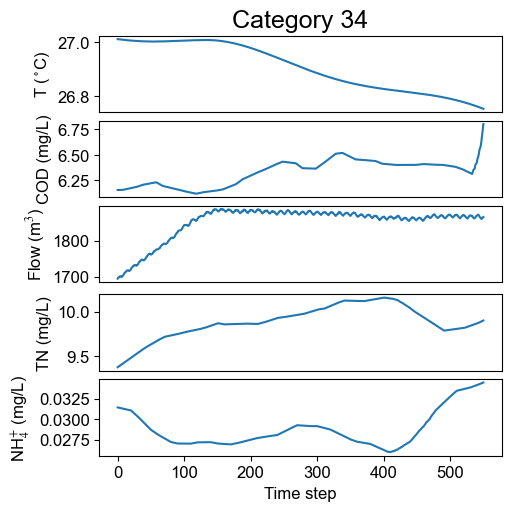

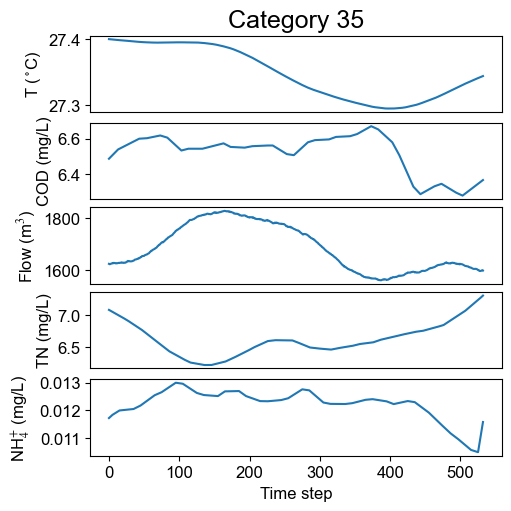

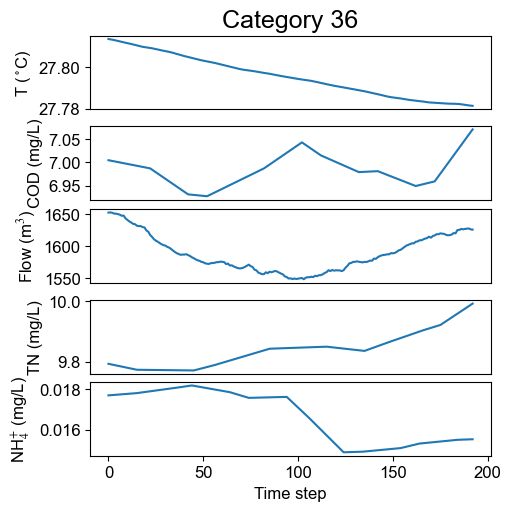

In [21]:
alphas = [0.8,0.4,0.4,0.4]
colors = ['#015482', '#61DE45', '#DEA13A', '#ff474c']#'#DE66C2''#5096DE'
ylabels = ['T ($^\circ$C)','COD (mg/L)','Flow (m$^{3}$)', 'TN (mg/L)','NH$_{4}^{+}$ (mg/L)']
fontsizes = [12, 15, 12, 18]

data_maxmin = np.load('../Step1_datasplit/databygroup_maxmin.npy',allow_pickle=True).tolist()
dmax = np.round(data_maxmin['max'][[-5,-4,-3,-2,-1]],2)
dmin = np.round(data_maxmin['min'][[-5,-4,-3,-2,-1]],2)
dmid = np.round((dmax+dmin)/2,2)

for category in [i for i in range(36)]:
    fig = plt.figure(dpi=100,
                    constrained_layout=True,#类似于tight_layout，使得各子图之间的距离自动调整【类似excel中行宽根据内容自适应】
                    figsize=(5,5)
                    )
    gs = GridSpec(5, 1, figure=fig)#GridSpec将fiure分为3行3列，每行三个axes，gs为一个matplotlib.gridspec.GridSpec对象，可灵活的切片figure

    if category == 0:
        ptdata = (GROUPED_SEQDATA[category][-1][:1000,[-5,-4,-3,-2,-1]]+1)*0.5*(dmax-dmin)+dmin
    else:
        ptdata = (GROUPED_SEQDATA[category][-1][:,[-5,-4,-3,-2,-1]]+1)*0.5*(dmax-dmin)+dmin


    for k in range(5):
        ax = fig.add_subplot(gs[k, 0])

        if k == 0:
            ax.set_title('Category '+str(category+1),fontsize=fontsizes[3])
        
        ax.plot(ptdata[:,k])
        ax.set_ylabel(ylabels[k], fontsize=fontsizes[2])
        if k < 4:
            ax.set_xticks([])
        else:
            ax.set_xlabel('Time step',fontsize=fontsizes[2])
        
        
        
    plt.savefig('../category dynamic figure/'+str(category)+'.png',dpi=300)


# 做二维聚类图

In [12]:
pca = PCA(n_components=2)
pca.fit(X)
Xpca = pca.transform(X)

In [13]:
colors_lab = list(set(clustering.labels_.tolist()))
colors = ['navajowhite','grey','lightcoral','sandybrown','palegreen','deepskyblue','crimson',
          'magenta','cyan','slateblue','navy','y','r','b',
          'orange','g','firebrick','wheat','khaki','gold','sienna',
          'plum','purple','m','cyan','coral','slategray','lime','k'
          ]

for i1 in range(5):
    for i2 in range(5):
        for i3 in range(5):
            tem = (i1/6,i2/6,i3/6)
            colors.append(tem)

print(len(colors_lab),len(colors))

pca_sca_data = {}
for i in range(clustering.labels_.shape[0]):
    pca_sca_data[i] = {
        'class_id':clustering.labels_[i],
        'class':colors[colors_lab.index(clustering.labels_[i])],
        #'class':colors_lab,
        'loc':Xpca[i,[0,1]]
        }

36 154


# 已经通过聚类分组了，但是如何筛选训练数据

## 按照上述分类与PCA坐标，找到与几何中心最近的数据，作为“代表性”数据

In [14]:
# 计算几何中心
data_type = list(set(clustering.labels_.tolist()))
data_group, data_centre = {}, {}
for k in data_type:
    data_group[k] = []

for k in pca_sca_data.keys():
    data_group[pca_sca_data[k]['class_id']].append(pca_sca_data[k]['loc'].tolist())

for k in data_group.keys():
    mx,my = np.mean(np.array(data_group[k])[:,0]),np.mean(np.array(data_group[k])[:,1])
    data_centre[k] = [mx,my]

In [15]:
# 找到每组数据中和对应几何中心最近的数据作为代表数据
def distance(p1,p2):
    return np.sqrt(np.power(p1[0]-p2[0],2)+np.power(p1[1]-p2[1],2))

repre_data, repre_data_ls = {}, []
for k in data_type:
    dmin, dminid = 10000, 0
    for kt in pca_sca_data.keys():
        if pca_sca_data[kt]['class_id'] == k:
            d = distance(pca_sca_data[kt]['loc'],np.array(data_centre[k]))
            if d < dmin:
                dminid = kt
    repre_data[k] = dminid
    repre_data_ls.append(dminid)

np.save('./select_dataid.npy',repre_data)

In [16]:
select, log, dataid = [], [], []
for i in range(len(list(AllK.keys()))):
    if i in repre_data_ls:
        select.append(list(AllK.keys())[i])

np.save('./select_filename.npy',select)
print(len(select))
print(select)

36
['historydata', 'sub3', 'sub4', 'sub5', 'sub8', 'sub9', 'sub11', 'sub12', 'sub14', 'sub19', 'sub21', 'sub24', 'sub25', 'sub26', 'sub31', 'sub35', 'sub37', 'sub39', 'sub41', 'sub42', 'sub44', 'sub46', 'sub47', 'sub49', 'sub51', 'sub52', 'sub53', 'sub56', 'sub58', 'sub59', 'sub61', 'sub63', 'sub68', 'sub70', 'sub73', 'sub74']


# 做PCA二维投影图
## 36个类，每9个类做到一张图里

In [18]:
colors_lab = list(set(clustering.labels_.tolist()))
colormap = plt.get_cmap('Blues')

pca_sca_data = {}
for i in range(clustering.labels_.shape[0]):
    pca_sca_data[i] = {
        'class_id':clustering.labels_[i],
        #'class':colors[colors_lab.index(clustering.labels_[i])],
        #'class':colors_lab,
        'loc':Xpca[i,[0,1]]
        }

C:\Users\chong\AppData\Local\Temp\ipykernel_13776\463611248.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pca_sca_data[i]['loc'][0],pca_sca_data[i]['loc'][1],
C:\Users\chong\AppData\Local\Temp\ipykernel_13776\463611248.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pca_sca_data[i]['loc'][0],pca_sca_data[i]['loc'][1],


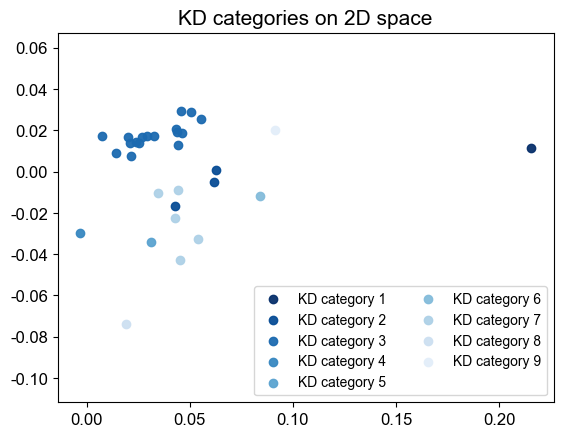

In [79]:
# 0-18 categories
n0, n1 = 0, 9
fontsizes = [10,15,15]

colors = colormap(np.linspace(1, 0.1, n1-n0)).tolist() # 按百分比

classid_log = []
for classid in range(n0, n1):
    for i in pca_sca_data.keys():
        if pca_sca_data[i]['class_id'] == classid:
            if classid not in classid_log:
                classid_log.append(classid)
                plt.scatter(pca_sca_data[i]['loc'][0],pca_sca_data[i]['loc'][1],
                            c = colors[classid],
                            alpha=0.95,
                            label='KD category '+ str(classid+1))
            else:
                plt.scatter(pca_sca_data[i]['loc'][0],pca_sca_data[i]['loc'][1],
                            c = colors[classid],
                            alpha=0.95)
            
plt.legend(ncol = 2,fontsize = fontsizes[0])
plt.axis('equal')
plt.title('KD categories on 2D space',fontsize=fontsizes[1])
plt.savefig('../KD_category_p1.png',dpi=300)
    

C:\Users\chong\AppData\Local\Temp\ipykernel_13776\2749749947.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pca_sca_data[i]['loc'][0],pca_sca_data[i]['loc'][1],
C:\Users\chong\AppData\Local\Temp\ipykernel_13776\2749749947.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pca_sca_data[i]['loc'][0],pca_sca_data[i]['loc'][1],


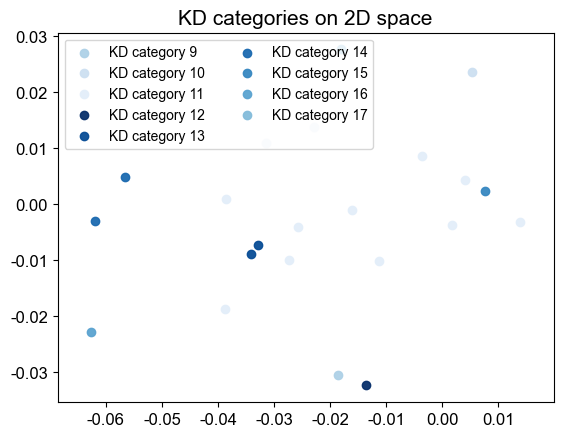

In [94]:
# 13-24 categories
n0, n1 = 9, 18
fontsizes = [10,15,15]

colors = colormap(np.linspace(1, 0.1, n1-n0)).tolist() # 按百分比

classid_log = []
for classid in range(n0, n1):
    for i in pca_sca_data.keys():
        if pca_sca_data[i]['class_id'] == classid:
            if classid not in classid_log:
                classid_log.append(classid)
                plt.scatter(pca_sca_data[i]['loc'][0],pca_sca_data[i]['loc'][1],
                            c = colors[classid-12],
                            alpha=0.95,
                            label='KD category '+ str(classid))
            else:
                plt.scatter(pca_sca_data[i]['loc'][0],pca_sca_data[i]['loc'][1],
                            c = colors[classid-12],
                            alpha=0.95)
            
plt.legend(ncol = 2, fontsize = fontsizes[0], loc = 'upper left')
plt.xlim([-0.1,0.03])
plt.axis('equal')
plt.title('KD categories on 2D space',fontsize=fontsizes[1])
plt.savefig('../KD_category_p2.png',dpi=300)
    

C:\Users\chong\AppData\Local\Temp\ipykernel_13776\2164851236.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pca_sca_data[i]['loc'][0],pca_sca_data[i]['loc'][1],
C:\Users\chong\AppData\Local\Temp\ipykernel_13776\2164851236.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pca_sca_data[i]['loc'][0],pca_sca_data[i]['loc'][1],


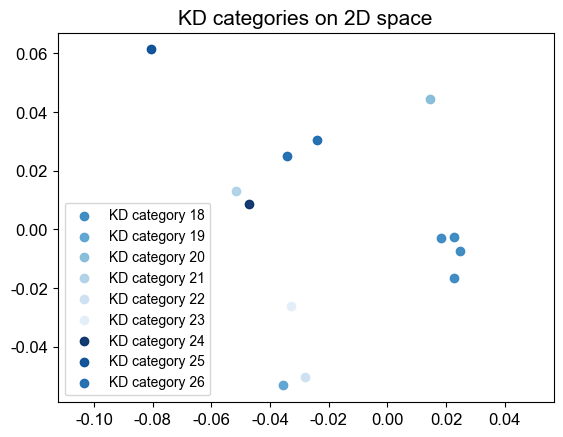

In [95]:
# 13-24 categories
n0, n1 = 18, 27
fontsizes = [10,15,15]

colors = colormap(np.linspace(1, 0.1, n1-n0)).tolist() # 按百分比

classid_log = []
for classid in range(n0, n1):
    for i in pca_sca_data.keys():
        if pca_sca_data[i]['class_id'] == classid:
            if classid not in classid_log:
                classid_log.append(classid)
                plt.scatter(pca_sca_data[i]['loc'][0],pca_sca_data[i]['loc'][1],
                            c = colors[classid-2*12],
                            alpha=0.95,
                            label='KD category '+ str(classid))
            else:
                plt.scatter(pca_sca_data[i]['loc'][0],pca_sca_data[i]['loc'][1],
                            c = colors[classid-2*12],
                            alpha=0.95)
            
plt.legend(ncol = 1, fontsize = fontsizes[0])
plt.axis('equal')
plt.title('KD categories on 2D space',fontsize=fontsizes[1])
plt.savefig('../KD_category_p3.png',dpi=300)
    

C:\Users\chong\AppData\Local\Temp\ipykernel_13776\4102598453.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pca_sca_data[i]['loc'][0],pca_sca_data[i]['loc'][1],


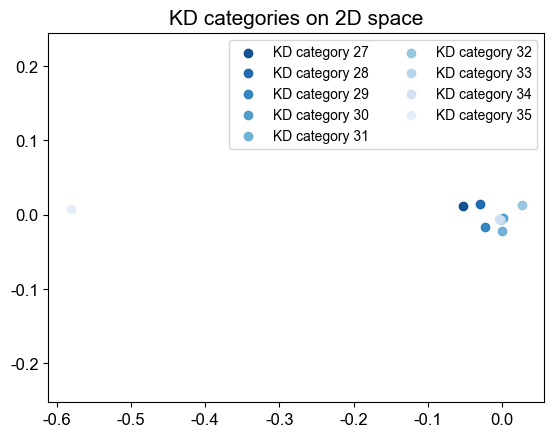

In [101]:
# 13-24 categories
n0, n1 = 27, 37
fontsizes = [10,15,15]

colors = colormap(np.linspace(1, 0.1, n1-n0)).tolist() # 按百分比

classid_log = []
for classid in range(n0, n1):
    for i in pca_sca_data.keys():
        if pca_sca_data[i]['class_id'] == classid:
            if classid not in classid_log:
                classid_log.append(classid)
                plt.scatter(pca_sca_data[i]['loc'][0],pca_sca_data[i]['loc'][1],
                            c = colors[classid-3*12],
                            alpha=0.95,
                            label='KD category '+ str(classid))
            else:
                plt.scatter(pca_sca_data[i]['loc'][0],pca_sca_data[i]['loc'][1],
                            c = colors[classid-3*12],
                            alpha=0.95)
            
plt.legend(ncol = 2, fontsize = fontsizes[0])
plt.axis('equal')
plt.title('KD categories on 2D space',fontsize=fontsizes[1])
plt.savefig('../KD_category_p4.png',dpi=300)
    